In [1]:
# ===============================
# STEP 1: Import Libraries
# ===============================
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
# ===============================
# STEP 2: Image Preprocessing
# ===============================

# Rescale images & augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values (0–1)
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)


In [3]:
train_data = train_datagen.flow_from_directory(
    r"D:\glasses-noglasses\train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    r"D:\glasses-noglasses\test",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 104 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
# ===============================
# STEP 4: Build CNN Model
# ===============================

model = Sequential()

# ----- Convolution Layer 1 -----
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# ----- Convolution Layer 2 -----
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# ----- Convolution Layer 3 -----
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# ----- Flatten -----
model.add(Flatten())

# ----- Fully Connected Layers -----
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# ----- Output Layer -----
model.add(Dense(1, activation='sigmoid'))


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# ===============================
# STEP 5: Compile Model
# ===============================

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [6]:
# ===============================
# STEP 6: Train the Model
# ===============================

history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5481 - loss: 0.8087 - val_accuracy: 0.5000 - val_loss: 0.6699
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 765ms/step - accuracy: 0.5192 - loss: 0.7162 - val_accuracy: 1.0000 - val_loss: 0.6578
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 643ms/step - accuracy: 0.6250 - loss: 0.6776 - val_accuracy: 1.0000 - val_loss: 0.6347
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - accuracy: 0.6923 - loss: 0.6603 - val_accuracy: 0.9500 - val_loss: 0.5601
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 597ms/step - accuracy: 0.6346 - loss: 0.6239 - val_accuracy: 0.9500 - val_loss: 0.4864
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 540ms/step - accuracy: 0.7500 - loss: 0.5488 - val_accuracy: 0.9000 - val_loss: 0.3901
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 594ms/step - accuracy: 0.7981 - loss: 0.4771 - val_accuracy: 0.9000 - val_loss: 0.2133
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 619ms/step - accuracy: 0.8269 - loss: 0.4291 - val_accuracy: 0.9000 - val_loss: 0

In [7]:
test_loss, test_accuracy = model.evaluate(test_data)

print("Test Accuracy:", test_accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.9000 - loss: 0.1575
Test Accuracy: 0.8999999761581421


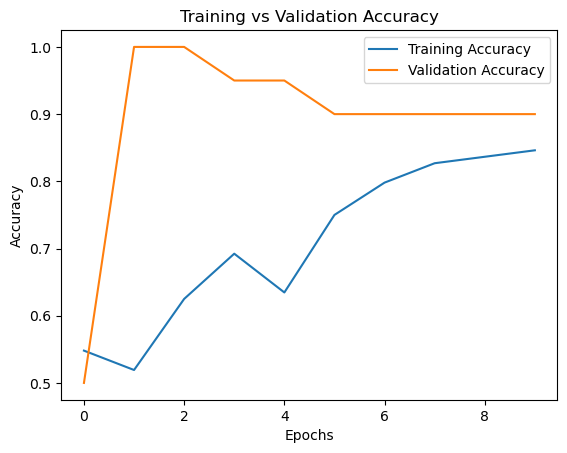

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


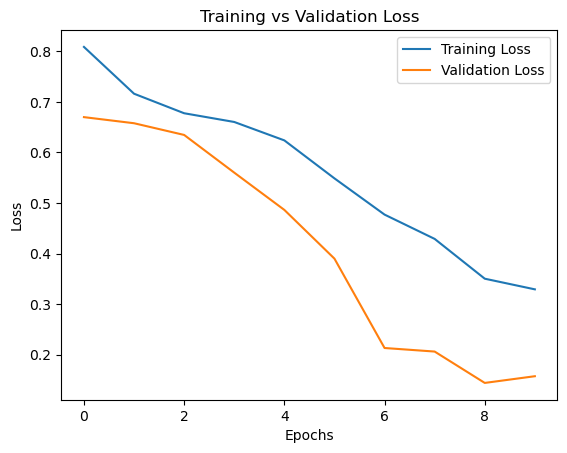

In [9]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r"D:\glasses-noglasses\test\noglass\row-7-column-1.jpg"

img = image.load_img(img_path, target_size=(128,128))
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)

print("NO GLASS" if pred[0][0] > 0.5 else "GLASS")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
NO GLASS


In [15]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    img = cv2.resize(frame, (128,128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img, verbose=0)

    if pred[0][0] > 0.3:
        label = "NO GLASS"
        color = (0, 255, 0)   # GREENq
    else:
        label = "GLASS"
        color = (0, 0, 255)   # RED

    cv2.putText(frame, label, (30,40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    

    cv2.imshow("Real World Glass Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
